In [1]:
# ToDo
# Quality control on events. Maybe only include in catalog if DeltaX on event

# Zachary Katz
# zachary_katz@mines.edu
# 22 December 2023

# PickEvents
# Kernel keeps crashing for such a large df. One way around this is to cut the
# pickle files off every few years so the data frame isnt so long.

# Thus change to years you want to analyze.


# Imports
import os


import pandas as pd
import numpy as np

In [2]:
import src.Catalog.CatalogWrapper as CatWrap
import src.Catalog.Catalog as Catalog

dir = "./tests/ExamplePos"
stas = ["la01", "la05"]
years = ["2010", "2011"]
interpolation_time = 15
max_gap_len = 120

cats = []
for sta in stas:
    cat = Catalog.Datastream(os.path.join(dir, sta), sta, years, interpolation_time)
    cat.findgaps(interpolation_time, max_gap_len)
    cats.append(cat)

catalog = CatWrap.full_catalog_run(
    cats, years, window=600, slide=25, active_stas=2, cull_time=30
)

ModuleNotFoundError: No module named 'Catalog'

/mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py:144: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, ind_data], ignore_index=True)
/mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py:288: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method="linear")  # Built-in pandas function
/mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py:288: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call ob

2011-01-01 21:57:45 2011-01-01 21:58:30 0 days 00:00:45 16533
2011-01-01 22:41:00 2011-01-01 22:42:45 0 days 00:01:45 16704
2011-01-01 23:53:30 2011-01-01 23:54:00 0 days 00:00:30 16988


/mnt/c/users/ZacharyKatz/Desktop/WhillansCatPaper/WhillansCatalogPaper/src/Catalog/Catalog.py:288: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data = data.interpolate(method="linear")  # Built-in pandas function


la01
la05
0.7408508102761552 1.350539331916283


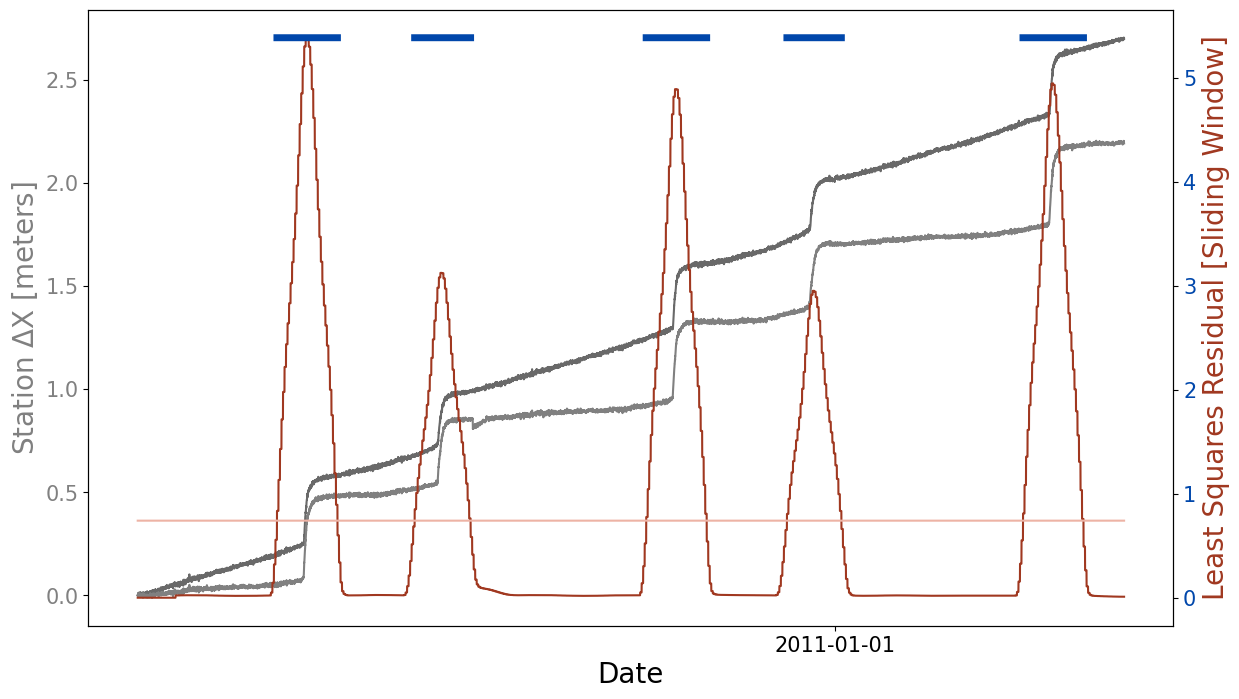

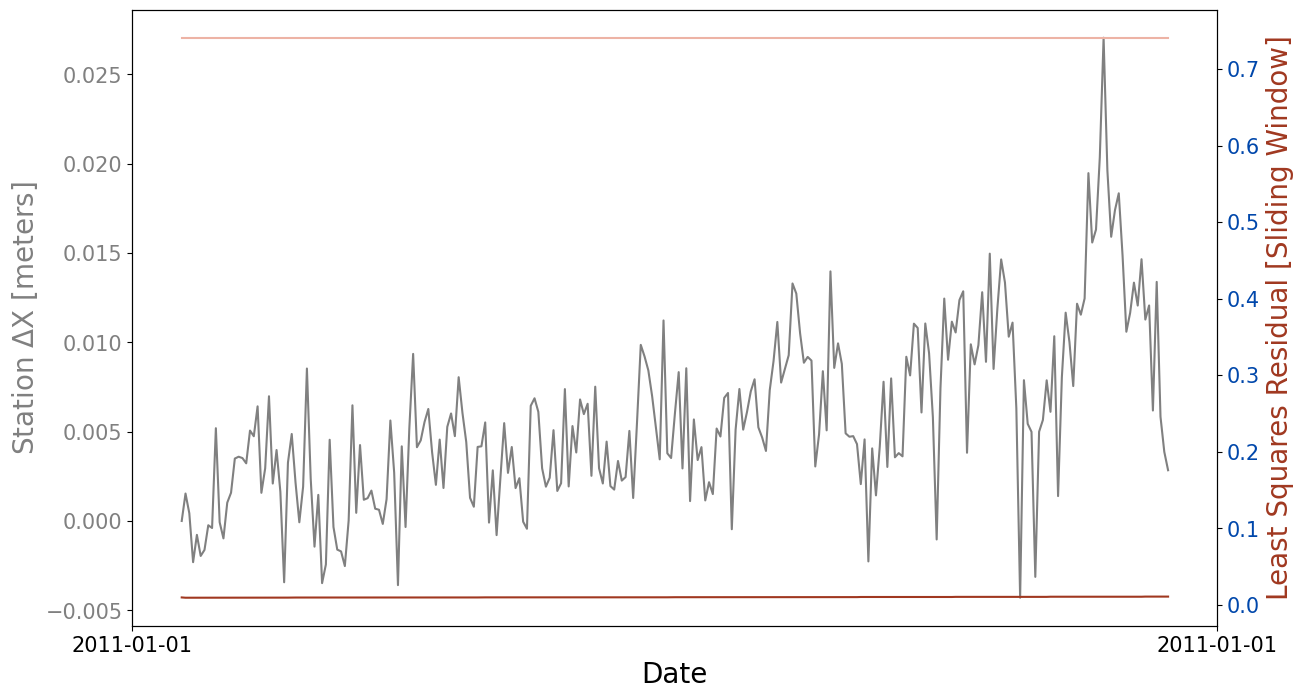

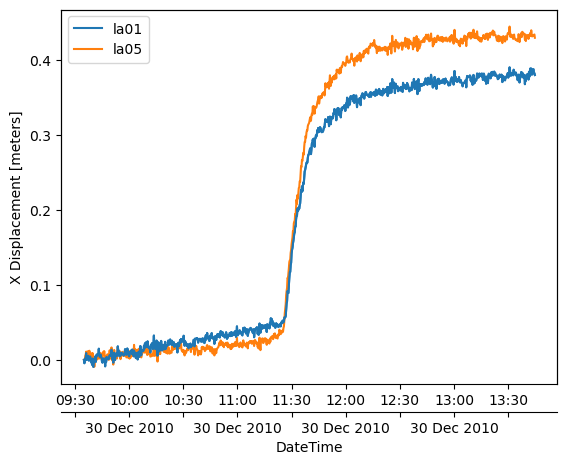

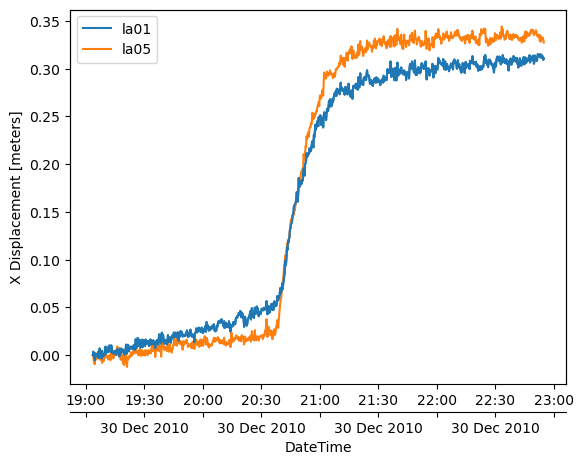

In [2]:
import src.Catalog.Catalog as Catalog
import os

dir = "./tests/ExamplePos"
stas = ["la01", "la05"]
years = ["2010", "2011"]
interpolation_time = 15
max_gap_len = 120

cats = []
for sta in stas:
    cat = Catalog.Datastream(os.path.join(dir, sta), sta, years, interpolation_time)
    cat.findgaps(interpolation_time, max_gap_len)
    cats.append(cat)

picks = Catalog.Picks(cats)
picks.lls_detection(600, 25)
merged = picks.merge()
sorted_list = picks.on_off_list()
picks.no_data_csv(sorted_list)
indices = picks.on_off_indices(merged, sorted_list)

merged, threshold = picks.pick_events(merged, sorted_list, active_stas=2)
picks.plot_picking(merged, indices, threshold, num_plots=4)

catalog = picks.make_catalog(merged, cull_time=30)
save_dir = f"./{years[0]}_{years[-1]}Events"
picks.save_catalog(catalog, save_dir)

for event in catalog[:2]:
    Catalog.plot_event(event)

In [54]:
# Make input text file for pretty GMT plot of the least squares residual and threshold
# DO NOT NEED TO RUN CELL
# Plot residual sum, threshold, and all active traces [Don't need to run cell]
thresh = 1
x_cols = ["la01x", "la05x"]


for i, index in enumerate(indices[:25]):
    if i > 0:
        if indices[i - 1] != indices[i]:
            start = indices[i - 1]
            end = index
            if i == 21:
                df = pd.DataFrame()
                time = merged["time"][start:end]
                df.insert(len(df.columns), "Time", time)
                for j, x_col in enumerate(x_cols):
                    x_j = (
                        merged[x_col][start:end]
                        - np.mean(merged[x_col][start:end])
                        - np.ones_like(merged[x_col][start:end])
                        * (merged[x_col][start] - np.mean(merged[x_col][start:end]))
                    )
                    if not np.isnan(x_j.iloc[0]):
                        df.insert(len(df.columns), x_col, x_j)
                ressum = merged["ressum"][start:end]
                thres = np.ones_like(merged["ressum"][start:end]) * thresh
                event = merged["event"][start:end]
                df.insert(len(df.columns), "Ressum", ressum)
                df.insert(len(df.columns), "Threshold", thres)
                df.insert(len(df.columns), "Event", event)
                print(df)
                df.to_csv("LeastSquaresGMT.txt", sep="\t", index=False)

                      Time     gz01x     gz14x     gz15x     la01x     la04x  \
133725 2013-01-24 05:11:15  0.000000  0.000000  0.000000  0.000000  0.000000   
133726 2013-01-24 05:11:30  0.002558  0.001666  0.002080  0.001187  0.000579   
133727 2013-01-24 05:11:45  0.002135 -0.000992  0.003134  0.001201  0.001394   
133728 2013-01-24 05:12:00  0.002059 -0.002913  0.004345  0.000416  0.002294   
133729 2013-01-24 05:12:15  0.007420  0.002064  0.011182  0.007327  0.009460   
...                    ...       ...       ...       ...       ...       ...   
161311 2013-01-29 00:07:45  3.474645  3.527580  3.530037  4.415894  3.871221   
161312 2013-01-29 00:08:00  3.471125  3.526630  3.532112  4.416304  3.866557   
161313 2013-01-29 00:08:15  3.470889  3.529472  3.533239  4.411059  3.866553   
161314 2013-01-29 00:08:30  3.471383  3.528683  3.535955  4.415049  3.866673   
161315 2013-01-29 00:08:45  3.476582  3.534729  3.540760  4.420003  3.871277   

           la06x     la07x     la08x   

In [16]:
"""
# List event start and end times in decimal year format for comparison with Matt's catalog allslip20150415.dat
print("StartTime", "EndTime", sep="\t")
for event in rev_catalog:
    start = event.iloc[0]["time"]
    end = event.iloc[-1]["time"]
    start_dec = pyasl.decimalYear(start)
    end_dec = pyasl.decimalYear(end)
    print(start_dec, end_dec, sep="\t")
"""

StartTime	EndTime
2010.040153633942	2010.040593131659
2010.0416081621004	2010.0417732115677
2010.0430469939117	2010.0434032534247
2010.0456035958905	2010.0460659246576
2010.0468959284626	2010.0472284056316
2010.0484836377473	2010.0488945966515
2010.0510378614915	2010.051491628615
2010.0536991057838	2010.0541504946727
2010.0557933789955	2010.056233828006
2010.0569796423135	2010.0573715753424
2010.0584579528158	2010.0588736681887
2010.0597398211569	2010.060118436073
2010.0612276445966	2010.0616352739726
2010.0624771689497	2010.062856259513
2010.064031107306	2010.064438736682
2010.0652501902587	2010.0656159627092
2010.0668402777778	2010.0672474315068
2010.0680636415525	2010.068397545662
2010.0696927321158	2010.0701098744291
2010.0708485540335	2010.0711444063927
2010.072629851598	2010.073057458143
2010.0754765981735	2010.0759470129376
2010.0764707001522	2010.0768269596651
2010.0782472412482	2010.0786819824962
2010.0792993721461	2010.0796570585997
2010.0811096841705	2010.0815372907155
2010.